In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

datasets = ['adult', 'letter', 'fashion', 'covertype', 'shuttle', 'MagicTelescope'] # 
data_names = ['Adult', 'Letter', 'Fashion', 'Covertype', 'Shuttle', 'MagicTelescope']
methods = ['neuronal_stream', 'ineural', 'margin', 'neual_ntk', 'alps']
method_name = ['NeurONAL-S', 'I-NeurAL', 'Margin', 'NeurAL-NTK', 'ALPS']
colors = ['red', 'blue', 'green', 'orange', 'purple']
linestyle = ['solid', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed', 'dashed']
input_dir = 'results/'
output_dir = 'graphs'
extension = '_res.txt'

col_names = ['rounds', 'query_num', 'bud_percent', 'num_epochs', 'regret']

In [6]:
def plot_dataset(d,n):
    neuronal = 0
    min_val = 10000
    for i in range(len(methods)):
        f_name = input_dir + d + '/' + methods[i] + extension

        try:
            f = pd.read_csv(f_name, header=None, nrows=10000)
            f.columns = col_names
            #x = f['query_num']
            x = range(f['regret'].size)
            plt.plot(x, f['regret'], linestyle=linestyle[i], color=colors[i], linewidth=2.0, label=method_name[i])

            if i == 0:
                neuronal = f['regret'].values.tolist()[-1]
            else:
                min_val = min(f['regret'].values.tolist()[-1], min_val)
        except:
            continue

    plt.legend()
    plt.xlabel('Rounds')
    plt.ylabel('Regret')
    plt.title(f'{n}')
    plt.savefig(f'{output_dir}/{d}_results.png')
    plt.figure().clear()

    print(f'on {d} we see {(min_val - neuronal) / min_val} improvement')

on adult we see 0.06884057971014493 improvement
on letter we see 0.040474905558553695 improvement
on fashion we see 0.07529722589167767 improvement
on covertype we see 0.0267022696929239 improvement
on shuttle we see 0.12195121951219512 improvement
on MagicTelescope we see 0.10626587637595258 improvement


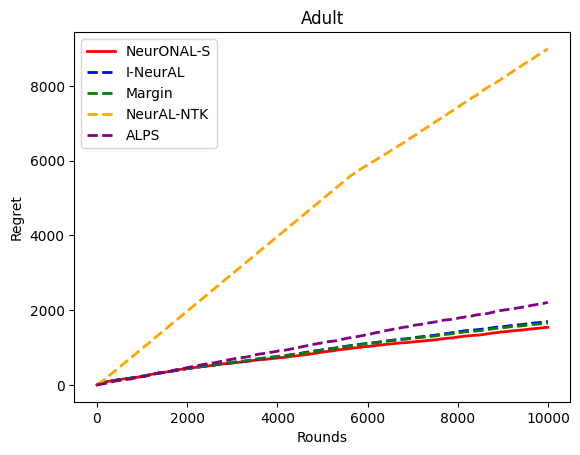

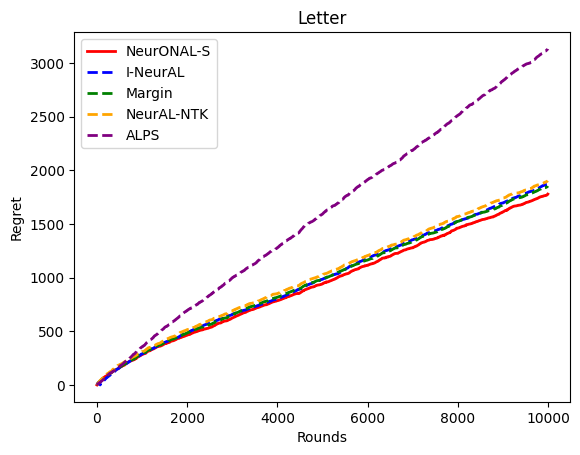

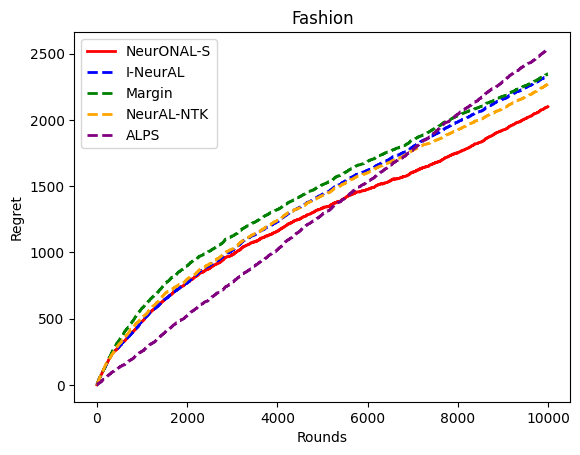

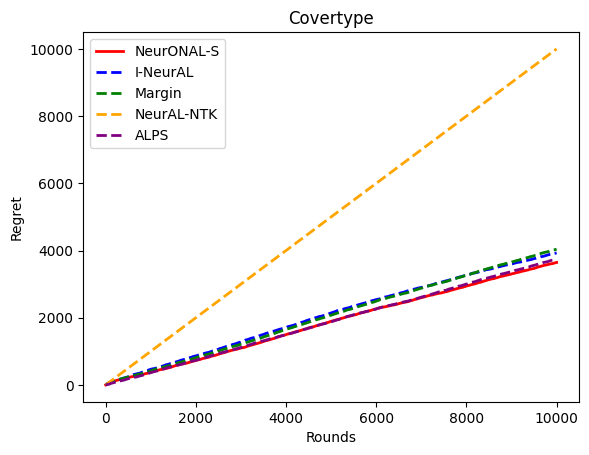

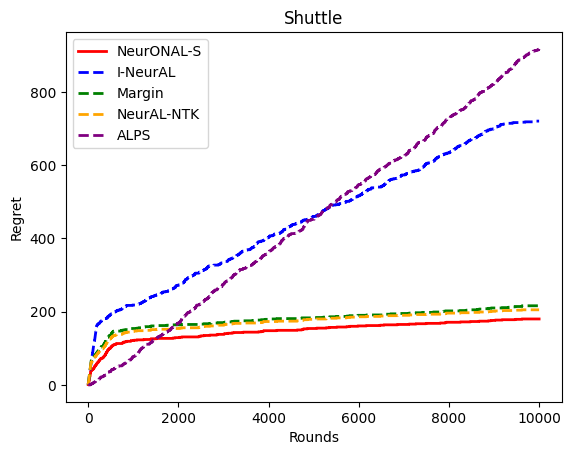

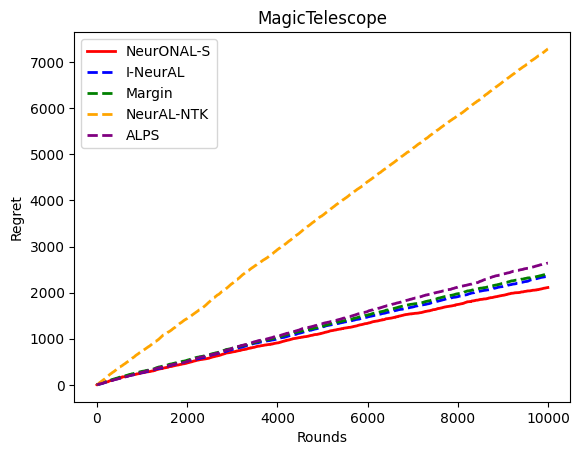

<Figure size 640x480 with 0 Axes>

In [7]:
for d,n in zip(datasets, data_names):
    plot_dataset(d, n)